In [1]:
using QuantumStates
using UnitsToValue

In [12]:
debye = 3.33564e-30 # in SI units (C⋅m)
;

In [13]:
a0 = UnitsToValue.CODATA2018.BohrRadius.val
e_charge = UnitsToValue.CODATA2018.ElementaryCharge.val
fine_constant = UnitsToValue.CODATA2018.FineStructureConstant.val
k_B = UnitsToValue.CODATA2018.BoltzmannConstant.val
E_h = ħ*c*fine_constant / a0
au = (a0 * e_charge)^2 / E_h
;

### Define lifetimes of relevant electronic states for CaOH

In [14]:
# A state
Γ_A = 1 / 25e-9
ω_A = 2π * c / 626e-9
ω_A / 2π

4.789016900958466e14

In [15]:
# B state
Γ_B = 1 / 20e-9
ω_B = 2π * c / 555e-9
ω_B / 2π

5.4016659099099094e14

In [16]:
# C state, T = 21896 cm^-1
# Assuming ⟨X|d|C⟩ = 0.51 (from CaF ab initio calculations)
ω_C = 2π * c * 21896 * 1e2
Γ_C = (ω_C^3 / (3ħ*π*ε_0*c^3)) * (0.51 * e_charge * a0)^2
ω_C / 2π

6.564255660368e14

In [17]:
# D²Σ⁺ state, T = 28156.20 cm^-1
ω_D = 2π * c * 28156.20 * 1e2
Γ_D = (ω_D^3 / (3ħ*π*ε_0*c^3)) * (0.31 * e_charge * a0)^2
ω_D / 2π

8.4410164059396e14

In [18]:
# E²Σ⁺ state, T = 29879 cm^-1
ω_E = 2π * c * 29879 * 1e2
Γ_E = (ω_E^3 / (3ħ*π*ε_0*c^3)) * (0.24 * e_charge * a0)^2
ω_E / 2π

8.957498852582001e14

In [19]:
α(ω,ω_ge,Γ) = (3π*ε_0*c^3*Γ/ω_ge^3) * (1/(ω_ge+ω)+1/(ω_ge-ω));

In [20]:
α_from_α0(ω,ω_ge,α0) = (α0 * ω_ge / 2) * (1/(ω_ge+ω)+1/(ω_ge-ω));

In [45]:
α(2π * c / 1064e-9,ω_B,Γ_B)

2.3279317214954276e-39

In [44]:
α_from_α0(2π * c / 1064e-9,ω_B,α0_B)

2.6048244396015006e-39

### Polarizability for the X state

In [21]:
# 1064 nm ODT
waist = 25e-6
I_max = 2*13/(π * waist^2)
;

In [22]:
# 780 nm tweezer
waist = 2e-6
I_max = 2*(1.0*0.200)/(π * waist^2)
;

In [23]:
I_max

3.183098861837907e10

In [24]:
# Lan's values
α0_A = 165.9 * au
α0_B = 115.0 * au
;

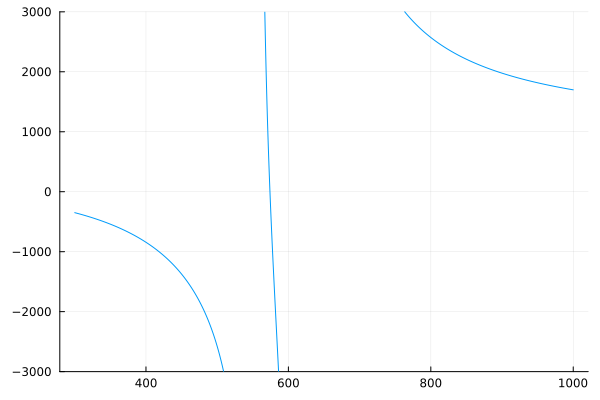

In [25]:
using Plots

λs = (300:0.1:1000)
ωs = 2π * c ./ (λs .* 1e-9)
# αs_A = [α(ω,ω_A,Γ_A) for ω ∈ ωs]
# αs_B = [α(ω,ω_B,Γ_B) for ω ∈ ωs]
# αs_D = [α(ω,ω_D,Γ_D) for ω ∈ ωs]
# αs_E = [α(ω,ω_E,Γ_E) for ω ∈ ωs]
αs_A = [α_from_α0(ω,ω_A,α0_A) for ω ∈ ωs]
αs_B = [α_from_α0(ω,ω_B,α0_B) for ω ∈ ωs]
# plot(λs, αs_A)
# plot!(λs, αs_B)
αs = 2αs_A/3 .+ αs_B/3
# plot(λs, αs)

U_trap = (1e6 * I_max * (1/(2ε_0*c)) * (1 / k_B)) .* αs
plot(λs, U_trap)
# vline!([555, 626], linestyle=:dash)
plot!(
    ylim=(-3000,3000),
    legend=false
)

In [26]:
λs[4801] |> display
U_trap[4801]

780.0

2781.1375472177224

In [27]:
λs[3260] |> display
U_trap[3260]

625.9

-2.4768498054387546e6

In [28]:
αs_A[3260]

-8.559504852728217e-36

In [29]:
(1e6 * I_max * (1/(2ε_0*c)) * (1 / k_B)) .* αs_A[3260]

-3.717201114054825e6

In [30]:
amu = 1.66e-27;

In [31]:
2 * sqrt(4 * k_B * U_trap[4801] * 1e-6 / (57amu * waist^2)) / 2π

202773.655734991

### Polarizability for the A state

In [20]:
# 780 nm ODT
waist = 16e-6
I_max = 2*1.6/(π * waist^2)
;

In [21]:
Γ_BA = ((ω_B-ω_A)^3 / (3ħ*π*ε_0*c^3)) * (0.43 * e_charge * a0)^2
Γ_CA = ((ω_C-ω_A)^3 / (3ħ*π*ε_0*c^3)) * (1.18 * e_charge * a0)^2
Γ_DA = ((ω_D-ω_A)^3 / (3ħ*π*ε_0*c^3)) * (1.93 * e_charge * a0)^2
Γ_EA = ((ω_E-ω_A)^3 / (3ħ*π*ε_0*c^3)) * (0.31 * e_charge * a0)^2
;

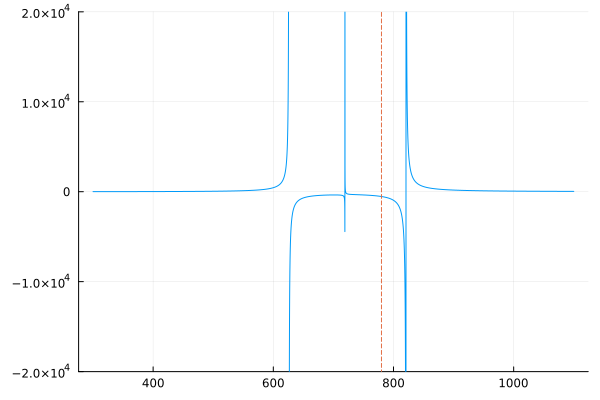

In [22]:
using Plots

λs = (300:0.1:1100)
ωs = 2π * c ./ (λs .* 1e-9)
αs_X = [-α(ω,ω_A,Γ_A) for ω ∈ ωs]
αs_B = [α(ω,ω_B-ω_A,Γ_BA) for ω ∈ ωs]
αs_D = [α(ω,ω_D-ω_A,Γ_DA) for ω ∈ ωs]
αs_E = [α(ω,ω_E-ω_A,Γ_EA) for ω ∈ ωs]
# plot(λs, αs_X)
# plot!(λs, αs_D)
# plot!(λs, αs_E)
αs = (2αs_X/3 + 2αs_B/3 + 2αs_D/3 + 2αs_E/3) / 2

U_trap = (1e6 * I_max * (1/(2ε_0*c)) * (1 / k_B)) .* αs
# plot(λs, U_trap)
plot(λs, αs ./ ((e_charge * a0)^2 / E_h))
vline!([780], linestyle=:dash)
plot!(
    ylim=(-20000,20000),
    legend=false
)

In [23]:
λs[7641] |> display
U_trap[7641]

1064.0

39.290722919988994

In [24]:
λs[4801] |> display
U_trap[4801]

780.0

-477.9149664261565

### Load $X(01^10)$ Hamiltonian

In [ ]:
H0 = load_from_file("CaOH_BendingMode_Hamiltonian", "G://Google Drive//github//QuantumStates//Hamiltonians//CaOH//")
;

In [25]:
const μX = 1e-6 * 1.465 * (1e-21 / c) / h;

In [28]:
import QuantumStates: polarizability, Zeeman

w = 25e-6; P = 13.25; I_trap = 2P / (π * w^2);
const α = [3.37471e-39, 0, -1.01809e-39] # 1064 nm
const θ = 0 * (π / 2)
const ϵ_trap = cos(θ) * [0.0, 1.0, 0.0] + sin(θ) * [1.0, 0.0, -1.0] / √2
polarizability(state, state′) = polarizability(state, state′, α, ϵ_trap)
@time H = add_to_H(H0, :I_trap, (1e-6 / h) * polarizability)

@time H = add_to_H(H, :E, (1e2 * μX) * Stark) # 1e2 converts from V/m to V/cm

const B_x = [1.0, 0.0, -1.0] ./ √2
const B_z = [0.0, 1.0, 0.0]
Zeeman_x(state, state′) = (1/√2)  * (Zeeman(state, state′, -1) - Zeeman(state, state′, +1))
Zeeman_y(state, state′) = (im/√2) * (Zeeman(state, state′, -1) + Zeeman(state, state′, +1))
Zeeman_z(state, state′) = Zeeman(state, state′, 0)
H = add_to_H(H, :B_x, gS * μ_B * Zeeman_x)
H = add_to_H(H, :B_y, gS * μ_B * Zeeman_y)
H = add_to_H(H, :B_z, gS * μ_B * Zeeman_z)

H.parameters.I_trap = (1.0 / 3.5) * I_trap / (2ε_0 * c)
H.parameters.E = 198 * 0.3
H.parameters.B_x = 0.0
H.parameters.B_z = 1e-6

@time full_evaluate!(H)
@time solve!(H)
;

  0.065475 seconds (15.21 k allocations: 998.306 KiB, 28.82% compilation time: 100% of which was recompilation)
  0.004906 seconds (37 allocations: 227.125 KiB)


  6.827613 seconds (14.93 M allocations: 857.660 MiB, 1.66% gc time, 97.25% compilation time)


  1.375831 seconds (5.23 M allocations: 294.980 MiB, 98.49% compilation time)


### Plot trap intensity dependence

In [5]:
I_trap_scan_range = (0:0.02:1) .* I_trap / (2ε0 * c)
x = scan_single_parameter(deepcopy(H), :I_trap, I_trap_scan_range);

In [6]:
plot_values = zeros(length(I_trap_scan_range), length(H.states))
for (i, I_trap_value) ∈ enumerate(sort(collect(keys(x.state_dict))))
    plot_values[i,:] = energy.(x.state_dict[I_trap_value])
end

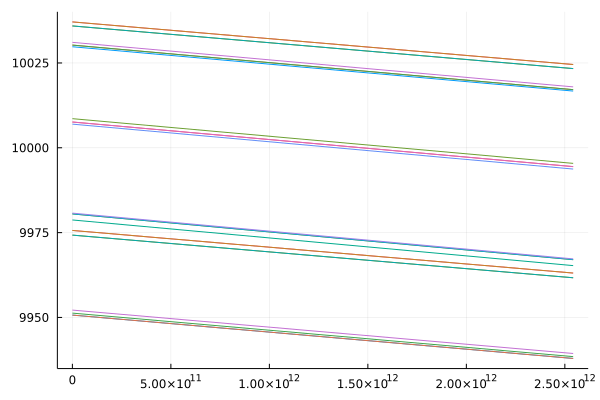

In [7]:
plot(I_trap_scan_range, plot_values[:,1:24], legend=nothing)

### Electric field scan

In [35]:
using LaTeXStrings

In [36]:
function H_func!(H, scan_values)
    H.parameters.E = scan_values[1]
    evaluate!(H)
    QuantumStates.solve!(H)
    return nothing
end
;

In [41]:
Es = 0.0:1.0:500
scan_params = (
    E = Es,
    );
iterator = Iterators.product
@time scan_values, _ = scan_parameters(deepcopy(H), scan_params, iterator, H_func!, H -> energy.(H.states), n_threads=1)
;

Progress: 100%|█████████████████████████████████████████| Time: 0:00:08


  9.143429 seconds (7.21 M allocations: 871.673 MiB, 1.07% gc time, 23.65% compilation time)


In [43]:
matrix_values = hcat(values(scan_values)...)';

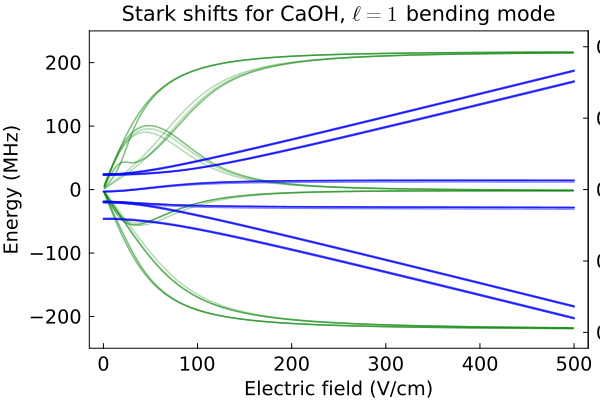

In [157]:
using Plots
using Plots.PlotMeasures
xs = collect(E_scan_range)
ys = matrix_values[:,1:24] .- 10000
plot(xs[1:end-1][2:end], differences_derivative(xs, ys)[2:end,:] * 1.486 .* 400, linewidth=1.5, linecolor=:green, alpha=0.3)
plot!(xs, ys, linewidth=1.5, linecolor=:blue, alpha=0.5)
plot!(
    legend=nothing, 
    # size=(1400,700),
    xlabel="Electric field (V/cm)",
    ylabel="Energy (MHz)",
    labelfontsize=13,
    tickfontsize=13,
    grid=:off,
    box=:on,
    ylim=(-250,250),
    title=L"Stark shifts for CaOH, $\ell = 1$ bending mode"
    )
plot!(twinx(),color=:red,xticks=:none,label="right",yticks=0.05:0.225:0.95,tickfontsize=13)

In [102]:
function differences_derivative(xs, ys)
    ys_diff = ys[2:end,:] .- ys[1:end-1,:]
    xs_diff = xs[2:end] - xs[1:end-1]
    return ys_diff ./ xs_diff
end; 

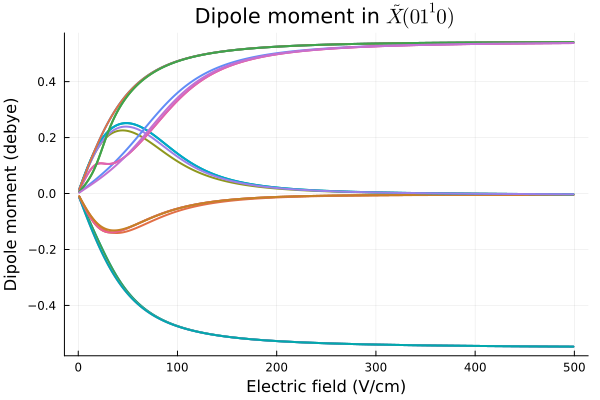

In [89]:
using Plots
plot!(xs[1:end-1][2:end], differences_derivative(xs, ys)[2:end,:] * 1.486, linewidth=2)
plot!(
    legend=nothing, 
    # size=(1400,700),
    xlabel="Electric field (V/cm)",
    ylabel="Dipole moment (debye)",
    title=L"Dipole moment in $\widetilde{X}(01^10)$"
    )

### Decoupled basis

In [20]:
H.parameters.E = 62.0
H.parameters.B_z = 0.0
evaluate!(H); solve!(H);

In [21]:
QN_bounds = (S = 1/2, I = 1/2, Λ = [-1,1], N = 1:3)
basis_decoupled = enumerate_states(HundsCaseB_Decoupled, QN_bounds)
states_decoupled = convert_basis(x.state_dict[62], basis_decoupled)
;

In [22]:
expectation(states_decoupled[subspace(H.states, (N=1,))[1][14]], :M_S)

0.005600369479115385 + 0.0im

In this basis, the first-order Stark shifts are given by the product $\Lambda M_N$:

In [23]:
idxs = subspace(states_decoupled, (M_N = 0,))[1];

### Magnetic field scan

In [24]:
using Plots.PlotMeasures

In [114]:
H.parameters

ParameterList(Dict(:B_y => 0.0, :cX => 2.053, :I_trap => 7.26354298635441e11, :DX => 0.0117818435994, :BX => 9996.819345976399, :B_z => 0.00101, :γX => 35.4954270272, :B_x => 0.0, :qX => 21.52809640898, :bFX => 2.602…))

In [45]:
H.parameters.E = 0.0
evaluate!(H) 
solve!(H)
states_idxs = subspace(H.states, (N=1,))[1]
;

In [57]:
Es = 0.0:0.1:65
g_factors = scan_single_parameter_gfactor(H, :E, Es);

In [88]:
Es[600] / 0.3

199.66666666666666

In [92]:
g_factors[600,14]

6.96036295266822e-8

In [111]:
g_factors[645,19]

-1.0757503332570195e-7

In [113]:
Es[645] / 0.3

214.66666666666669

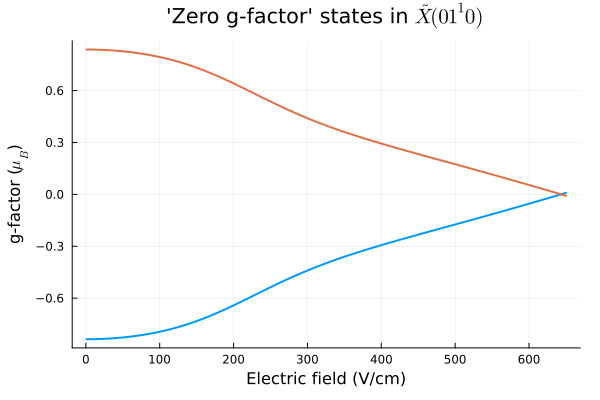

In [95]:
plot(g_factors[2:end, states_idxs[18:19]] ./ maximum(g_factors), linewidth=2)
plot!(
    legend=nothing,
    xlabel="Electric field (V/cm)",
    ylabel=L"g-factor ($\mu_B$)",
    title=L"'Zero g-factor' states in $\widetilde{X}(01^10)$",
    margin=3mm
    )

### Plot $\langle \Sigma \rangle$ versus electric field E

In [20]:
H.parameters.E = 0.0
H.parameters.B = 0.0
evaluate!(H)
solve!(H)

In [21]:
plot_values = zeros(length(E_scan_range), length(H.states))
for (i, E_value) ∈ enumerate(sort(collect(keys(x.state_dict))))
    plot_values[i,:] = Σ.(x.state_dict[E_value])
end

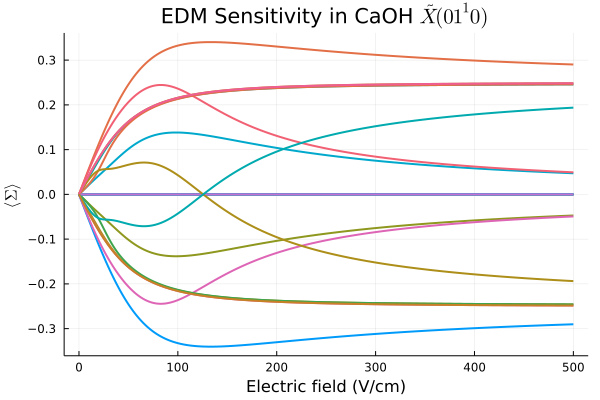

In [22]:
xs = collect(E_scan_range)
ys = plot_values[:,1:24]
plot(xs, ys, linewidth=2)
plot!(
    legend=nothing,
    # size=(1400,700),
    xlabel="Electric field (V/cm)",
    ylabel=L"\langle \Sigma \rangle",
    title=L"EDM Sensitivity in CaOH $\widetilde{X}(01^10)$"
    )